In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv("./data/political_leaning.csv")
df.rename(columns={'auhtor_ID': 'author_ID'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57231 entries, 0 to 57230
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   author_ID          57231 non-null  object
 1   post               57231 non-null  object
 2   political_leaning  57231 non-null  object
dtypes: object(3)
memory usage: 1.3+ MB


In [5]:
print(df['political_leaning'].value_counts(normalize=True))

political_leaning
center    0.440338
right     0.304975
left      0.254687
Name: proportion, dtype: float64


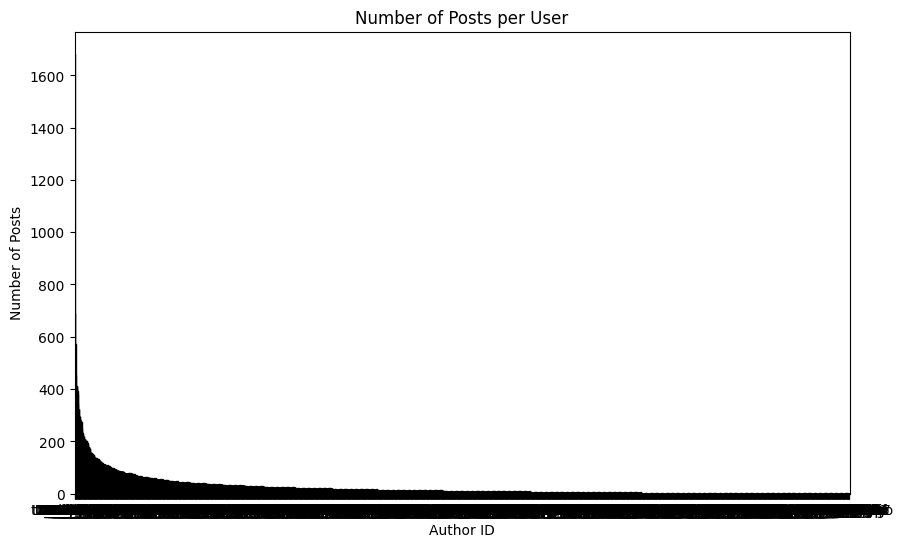

In [6]:
post_counts = df.groupby('author_ID').size().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
post_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Posts per User')
plt.xlabel('Author ID')
plt.ylabel('Number of Posts')
plt.xticks(rotation=0)
plt.show()

In [7]:
percentile_95 = np.percentile(post_counts, 95)
print(f"95th Percentile of Posts per User: {percentile_95}")

95th Percentile of Posts per User: 97.0


In [8]:
print(f"Median of Posts per User: {np.median(post_counts)}")

Median of Posts per User: 11.0


In [9]:
print(f"Mean of Posts per User: {np.mean(post_counts)}")

Mean of Posts per User: 26.276859504132233


In [10]:
# Resample users with more than 95th percentile posts
max_posts = int(percentile_95)
df_resampled = df.groupby('author_ID').apply(
    lambda x: x.sample(n=max_posts, random_state=42) if len(x) > max_posts else x
).reset_index(drop=True)

print(f"New dataset size: {len(df_resampled)}")

New dataset size: 46061


C:\Users\arina\AppData\Local\Temp\ipykernel_10016\48109501.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_resampled = df.groupby('author_ID').apply(


In [11]:
df_resampled.head()

,author_ID,post,political_leaning
0,t2_103jrs,"Music for plants!! Wow, don’t take her for gra...",left
1,t2_103jrs,"other perspectives, even in fiction. Children ...",left
2,t2_103pns,You say that like people aren't already cogs i...,right
3,t2_103pns,for who we got. I WILL say this is probably wh...,right
4,t2_103pns,as loud with Eagles chants. Not sure about the...,right


In [12]:
grouped = df_resampled.groupby('political_leaning')
min_size = min(grouped.size())

# Sample equal number of posts from each group (33% each)
balanced_df = grouped.apply(lambda x: x.sample(n=min_size, random_state=42)).reset_index(drop=True)

# Check distribution
print(balanced_df['political_leaning'].value_counts(normalize=True))
print(f"Balanced Dataset Size: {len(balanced_df)}")

political_leaning
center    0.333333
left      0.333333
right     0.333333
Name: proportion, dtype: float64
Balanced Dataset Size: 36876


C:\Users\arina\AppData\Local\Temp\ipykernel_10016\3417977236.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  balanced_df = grouped.apply(lambda x: x.sample(n=min_size, random_state=42)).reset_index(drop=True)


In [13]:
# Oversampling smaller groups
oversampled_df = grouped.apply(lambda x: x.sample(n=min_size, replace=True, random_state=42)).reset_index(drop=True)
print(oversampled_df['political_leaning'].value_counts(normalize=True))
print(f"Oversampled Dataset Size: {len(oversampled_df)}")

political_leaning
center    0.333333
left      0.333333
right     0.333333
Name: proportion, dtype: float64
Oversampled Dataset Size: 36876


C:\Users\arina\AppData\Local\Temp\ipykernel_10016\52194022.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  oversampled_df = grouped.apply(lambda x: x.sample(n=min_size, replace=True, random_state=42)).reset_index(drop=True)


In [14]:
oversampled_df

,author_ID,post,political_leaning
0,t2_kj8twzq5,dog (pic on my profile). Longer hair but other...,center
1,t2_1404zt,a skyscraper is probably gonna be mostly concr...,center
2,t2_4erzxbrz,intentionally wash your ass are Poseidon's fre...,center
3,t2_ccx3o6,you will struggle. Still Jungle is a very simi...,center
4,t2_b19hyjws,kitlesini sevmezdim ama kral adammış Genj adam...,center
...,...,...,...
36871,t2_3o8ve4o5,roll again I'm sure. Calf yeah. He just sunk N...,right
36872,t2_27cg61x7,PATE WILL BE THERE!!! Beautiful. My Mom when I...,right
36873,t2_f6xmwek2,"been to some serious shitholes, because i live...",right
36874,t2_4m0x1x,"neighbors, give the middle finger to the gover...",right


In [15]:
oversampled_df.to_csv('sample.csv', index=False)